# Лабораторная работа 222: Изучение колебаний с помощью LC-цепочки

In [1228]:
import numpy as np
import matplotlib.pyplot as polt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from IPython.display import Image

from typing import Any, Callable

In [1229]:
LC_sqrt = 8.37 * 10**(-6)

nu_0 = 1/(np.pi * LC_sqrt)

## Исследование бегущей волны

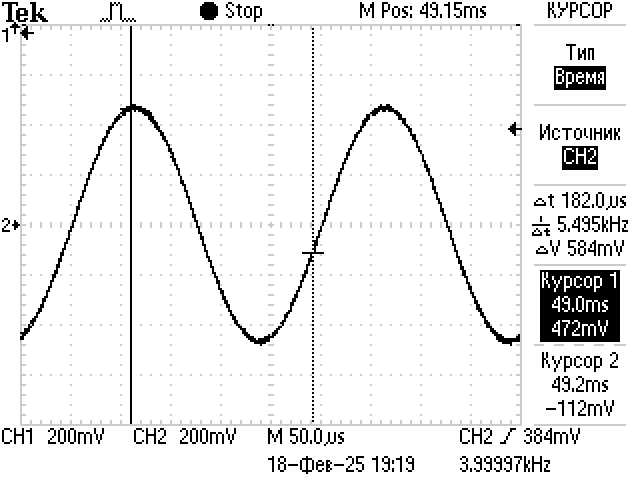

In [1230]:
Image("pictures/TEK0000.jpg")

In [1231]:
frequencies = np.array([4, 8, 12, 16, 20, 24, 28, 32, 36, 38])*10**3

Oy_intersection_dist = np.array([4.5,    # TEK0001
                                 8.5,    # TEK0002
                                 11.5,   # TEK0003
                                 11.5,   # TEK0004
                                 9,      # TEK0005
                                 12.5,   # TEK0006
                                 13,     # TEK0007
                                 13,     # TEK0008
                                 8.5,    # TEK0009
                                 3       # TEK0010
                               ])

peak_distance = np.array([11.5,   # TEK0001
                          11.5,   # TEK0002
                          11.55,  # TEK0003
                          11.5,   # TEK0004
                          12.5,   # TEK0005
                          13,     # TEK0006
                          13,     # TEK0007
                          13.5,   # TEK0008
                          14,     # TEK0009
                          15      # TEK0010
                        ])

# индексы развернутых эллипсов
ellipse_reversal_indexes: list[int] = [3, 4, 6, 7, 8, 9]

# те, которые развернулись, вычитаем из pi
phase_shift = []
for i in range(len(peak_distance)):
    if i in ellipse_reversal_indexes:
        phase_shift.append(np.pi - np.arcsin(Oy_intersection_dist[i]/peak_distance[i]))
    else:
        phase_shift.append(np.arcsin(Oy_intersection_dist[i]/peak_distance[i]))
    
    # так как первые 5 смотрели между 1 и 3 клеммами, делим на 2
    if i < 5:
        phase_shift[i] /= 2

print("Разности частот в градусах:")
print(np.rad2deg(np.array(phase_shift)))

Разности частот в градусах:
[ 11.51784205  23.82869727  42.33339652  45.          66.97275978
  74.05763139  90.         105.64247101 142.61680158 168.46304097]


### Теоретическая формула

$ \phi = 2 \arcsin(\frac{f}{\nu_0})$

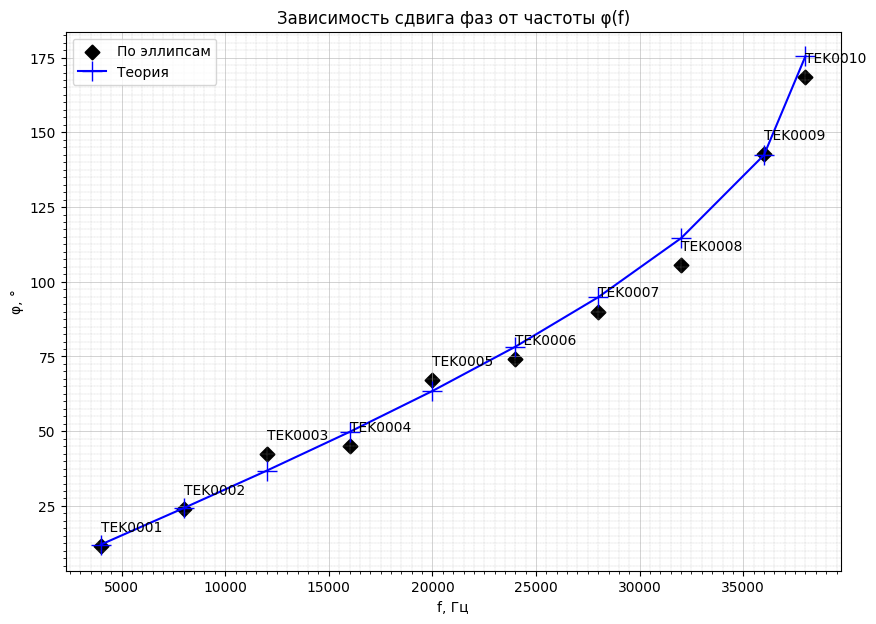

In [1232]:
_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Зависимость сдвига фаз от частоты φ(f)")
axs.set_xlabel("f, Гц")
axs.set_ylabel("φ, °")

axs.scatter(frequencies, 
            np.rad2deg(phase_shift), 
            s = 50, 
            linewidths = 1.5, 
            marker = "D", 
            color = "black", 
            label = "По эллипсам")

# подписи по картинкам
for i, (x, y) in enumerate(zip(frequencies, np.rad2deg(phase_shift))):
    signature: str = f"TEK000{i+1}" if i+1 < 10 else f"TEK00{i+1}"
    axs.text(x, y + 5, signature)

# теория
axs.plot(frequencies, 
         2 * np.rad2deg(np.arcsin(frequencies/nu_0)), 
         marker = "+", 
         markersize = 15,
         color = "blue",
         label = "Теория")

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle='--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()

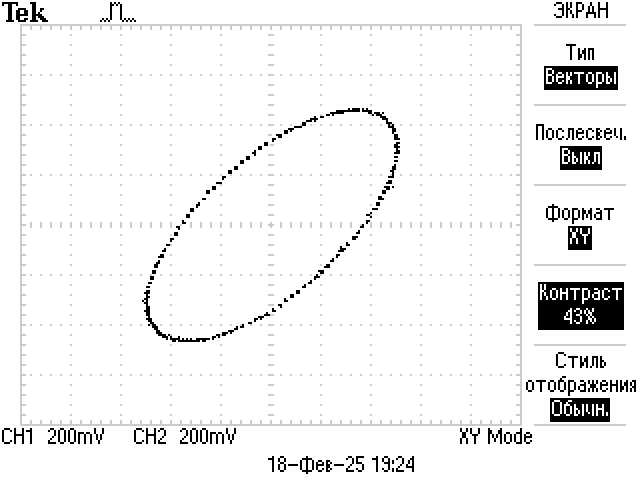

In [1233]:
Image("pictures/TEK0002.jpg")

## Исследование резонансов

### Теоретические формулы

$Z_k = \infty \implies \omega_m = \frac{2}{\sqrt{L C}} \sin(\frac{m \pi}{2 N})$

$Z_k = 0 \implies \omega_m = \frac{2}{\sqrt{L C}} \sin(\frac{\pi}{4 N} + \frac{m \pi}{2 N})$

In [1234]:
circuit_voltage_distribution: dict[str, list[int]] =\
{
  "inf":  [528, 496, 424, 304, 160, 24,  184, 328, 424, 528],
  "zero": [560, 552, 536, 504, 456, 400, 328, 256, 184, 0  ]
}

resonances: dict[str, Any] =\
{
  "inf":  np.array([5.7, 11.5, 17,   22,   26.4, 30.2, 33.4, 35.7, 37.8]) * 10**3,
  "zero": np.array([2.9,  8.6, 14.2, 19.6, 24.3, 28.5, 31.9, 34.8, 36.8]) * 10**3
}

N = 10

### При $ Z_k = \infty $

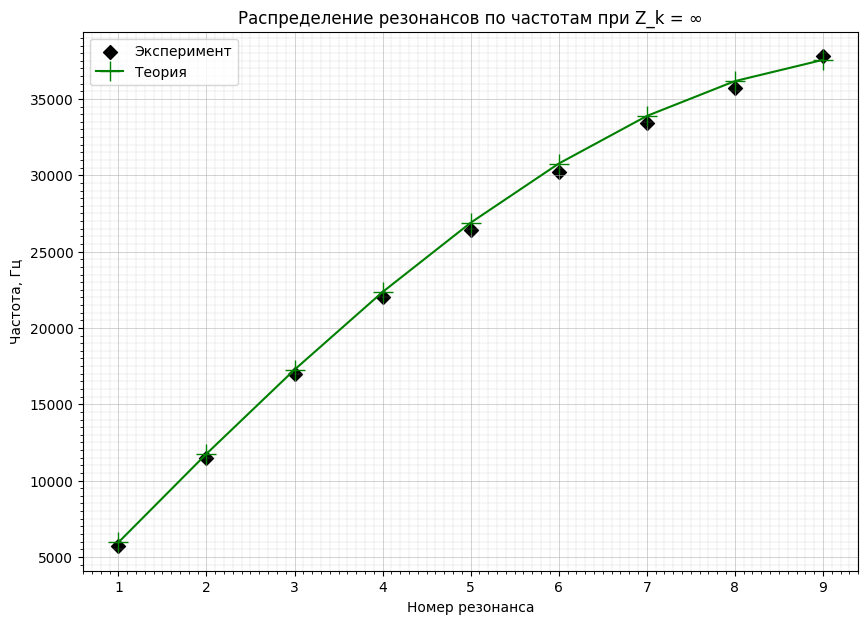

In [1235]:
x_points = np.arange(1, 9+1)

_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Распределение резонансов по частотам при Z_k = ∞")
axs.set_xlabel("Номер резонанса")
axs.set_ylabel("Частота, Гц")

axs.scatter(x_points, 
            resonances["inf"], 
            s = 50, 
            marker = "D", 
            label = "Эксперимент", 
            color = "black")

# Теория
axs.plot(x_points, 
         (1/(np.pi * LC_sqrt)) * np.sin((x_points * np.pi)/(2*N)),
         marker = "+",
         markersize = 15,
         label = "Теория",
         color = "green")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle = '--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()

### Девятый резонанс:

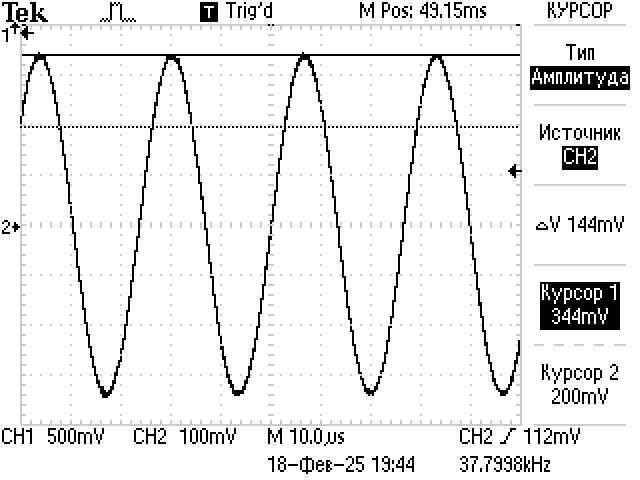

In [1236]:
Image("pictures/TEK0011.JPG")

### Распределение по цепочке

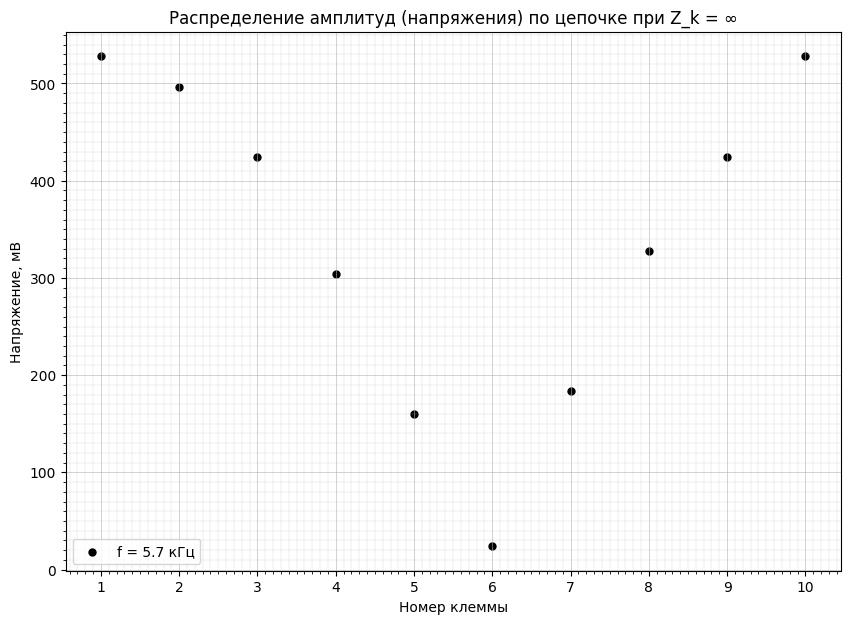

In [1237]:
_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Распределение амплитуд (напряжения) по цепочке при Z_k = ∞")
axs.set_xlabel("Номер клеммы")
axs.set_ylabel("Напряжение, мВ")

axs.scatter(range(1, 10+1), 
            circuit_voltage_distribution["inf"], 
            marker = "o", 
            s = 25, 
            label = "f = 5.7 кГц", 
            color = "black")


axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle = '--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()

#### 1 клемма:

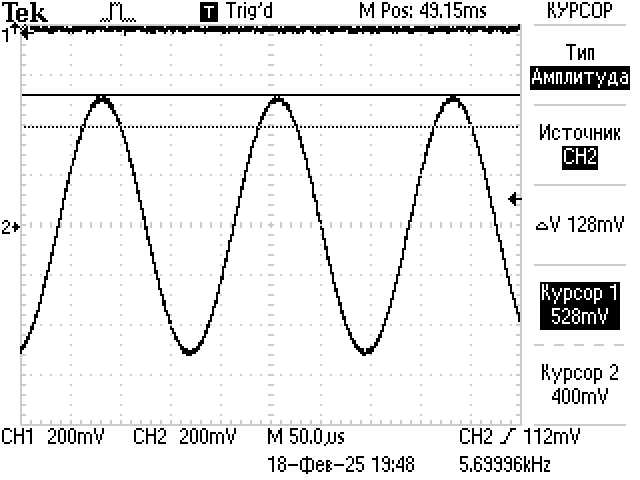

In [1238]:
Image("pictures/TEK0012.JPG")

#### 9 клемма:

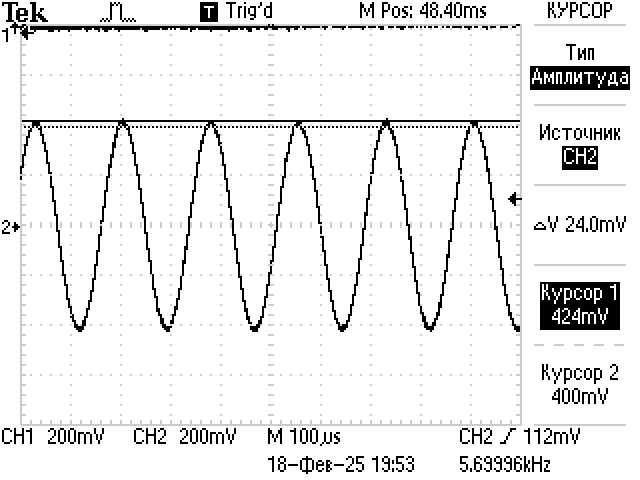

In [1239]:
Image("pictures/TEK0013.JPG")

In [1240]:
def Lorentzian(f: float,
               f0: float,
               A_max: float,
               gamma: float) -> float:
    """
    Функция Лоренца.

    Args:
        f (float): частота, на которой вычисляется значение.
        f0 (float): резонансная частота.
        A_max (float): максимальная амплитуда.
        gamma (float): ширина резонанса.

    Returns:
        float: значение функции Лоренца на частоте f.
    """

    return A_max / (1 + (2 * (f - f0) / gamma)**2)


def ApproximateResonanceCurve(f0: float,
                              f1: float,
                              f2: float,
                              A_max: float = 1
                              ) -> tuple[Callable, float]:
    """
    Аппроксимирует резонансную кривую по трём точкам.

    Args:
        f0 (float): резонансная частота.
        f1 (float): частота слева от резонанса, где амплитуда A_max / sqrt(2).
        f2 (float): частота справа от резонанса, где амплитуда A_max / sqrt(2).
        A_max (float, optional): максимальная амплитуда. Defaults to 1.

    Returns:
        tuple[Callable, float]: функция, представляющую аппроксимированную резонансную кривую, 
                                ширина резонанса
    """

    gamma_factor = np.sqrt(np.sqrt(2) - 1)
    gamma_1 = 2 * abs(f1 - f0) / gamma_factor
    gamma_2 = 2 * abs(f2 - f0) / gamma_factor
    gamma = (gamma_1 + gamma_2) / 2

    def resonance_curve(f):
        return Lorentzian(f, f0, A_max, gamma)

    return resonance_curve, gamma


#### Резонансная кривая при 1 резонансе на первой клемме

Оценка ширины резонанса: 1398.3965766270335
Оценка добротности: 6.333333333333333


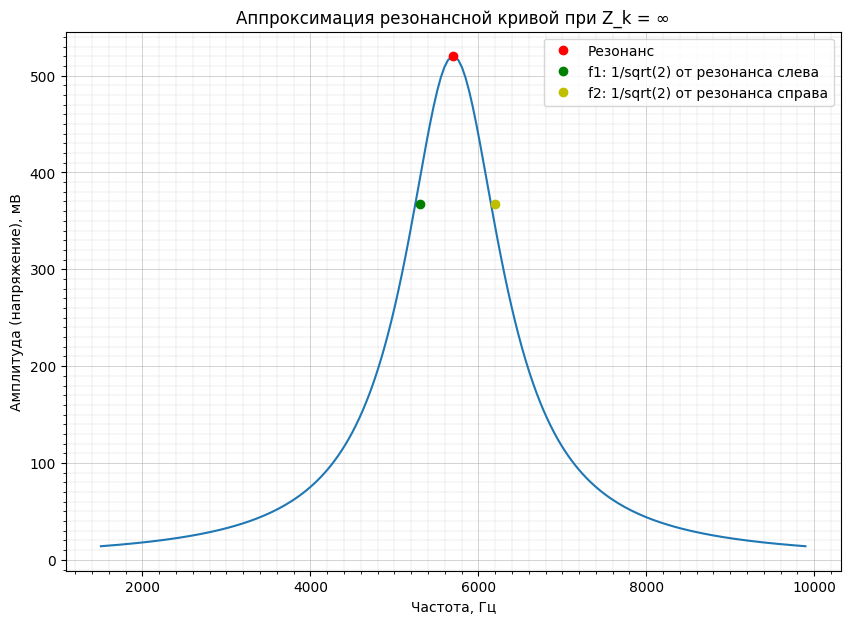

In [1241]:
_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Аппроксимация резонансной кривой при Z_k = ∞")
axs.set_xlabel("Частота, Гц")
axs.set_ylabel("Амплитуда (напряжение), мВ")

f0 = 5.7 * 10**3  # резонансная частота
f1 = 5.3 * 10**3  # частота слева, где амплитуда 1/sqrt(2)
f2 = 6.2 * 10**3  # частота справа, где амплитуда 1/sqrt(2)
resonance = 520

resonance_curve, gamma = ApproximateResonanceCurve(f0, f1, f2, resonance)

print(f"Оценка ширины резонанса: {gamma}")
print(f"Оценка добротности: {f0/(f2 - f1)}")

frequencies = np.linspace(f0 - 3 * gamma, f0 + 3 * gamma, 200)
amplitudes = [resonance_curve(f) for f in frequencies]
polt.plot(frequencies, amplitudes)

polt.plot(f0, resonance, 'ro', label='Резонанс')
polt.plot(f1, resonance / np.sqrt(2), 'go', label='f1: 1/sqrt(2) от резонанса слева')
polt.plot(f2, resonance / np.sqrt(2), 'yo', label='f2: 1/sqrt(2) от резонанса справа')

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle='--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()

### При $ Z_k = 0 $

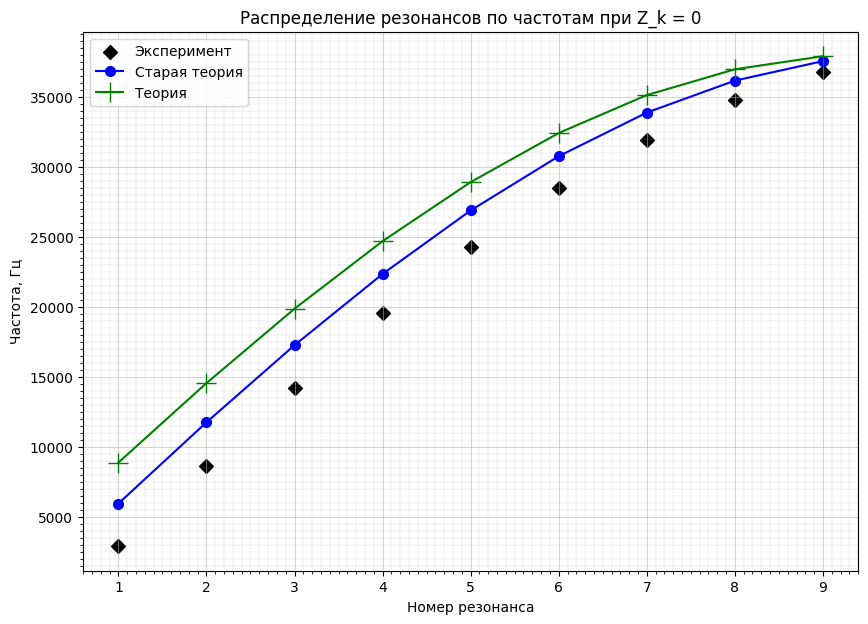

In [1242]:
x_points = np.arange(1, 9+1)

_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Распределение резонансов по частотам при Z_k = 0")
axs.set_xlabel("Номер резонанса")
axs.set_ylabel("Частота, Гц")

axs.scatter(x_points, 
            resonances["zero"], 
            s = 50,
            marker = "D", 
            label = "Эксперимент", 
            color = "black")

# теория по предыдущей формуле
axs.plot(x_points, 
         (1/(np.pi * LC_sqrt)) * np.sin((x_points * np.pi)/(2*N)),
         marker = "o",
         markersize = 7,
         label = "Старая теория",
         color = "blue")

# теория по новой формуле
axs.plot(x_points, 
         (1/(np.pi * LC_sqrt)) * np.sin(np.pi/(4*N) + (x_points * np.pi)/(2*N)),
         marker = "+",
         markersize = 15,
         label = "Теория",
         color = "green")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle = '--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()

#### Распределение по цепочке

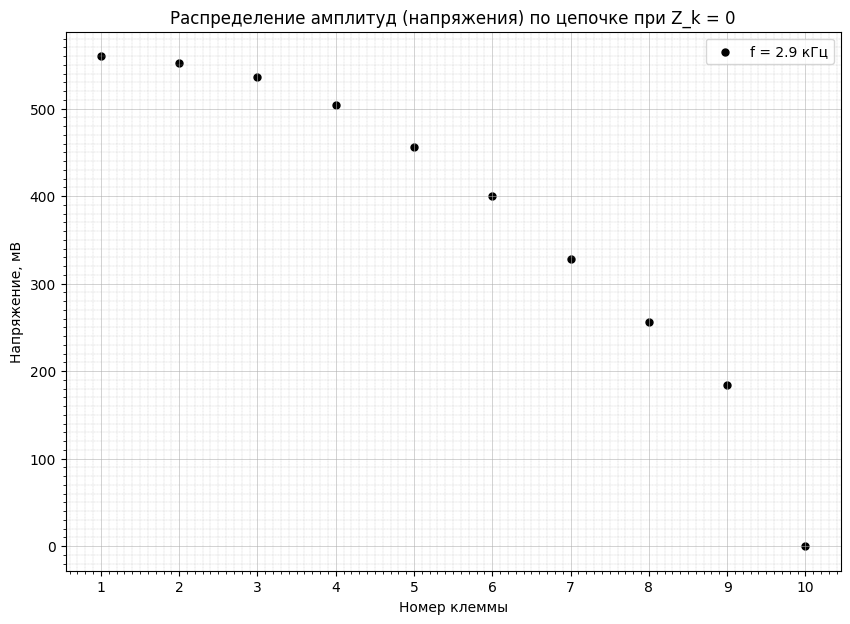

In [1243]:
_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Распределение амплитуд (напряжения) по цепочке при Z_k = 0")
axs.set_xlabel("Номер клеммы")
axs.set_ylabel("Напряжение, мВ")

axs.scatter(range(1, 10+1), 
            circuit_voltage_distribution["zero"], 
            marker = "o",
            s = 25, 
            label = "f = 2.9 кГц", 
            color = "black")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle = '--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()

#### Резонансная кривая при 1 резонансе на первой клемме

Оценка ширины резонанса: 1336.245617665832
Оценка добротности: 3.372093023255814


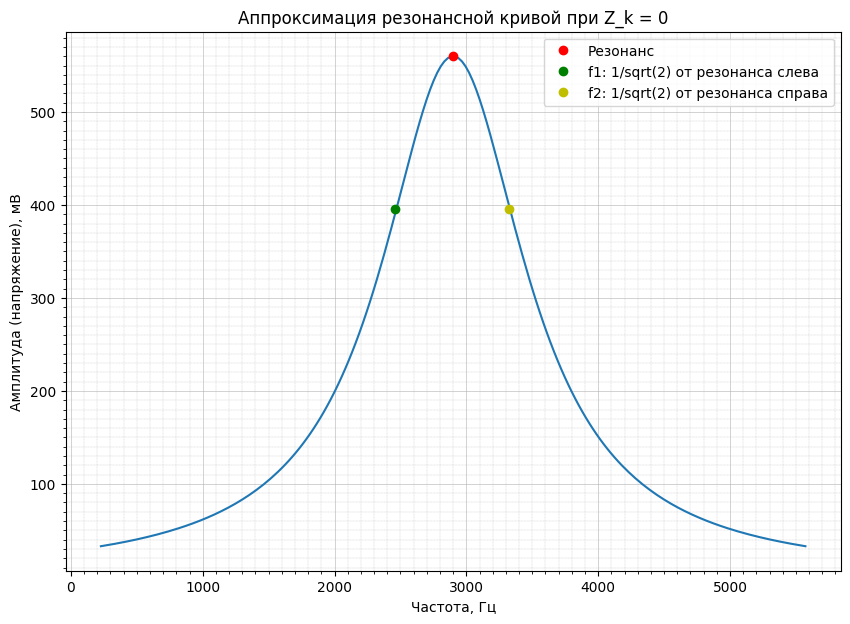

In [1244]:
_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Аппроксимация резонансной кривой при Z_k = 0")
axs.set_xlabel("Частота, Гц")
axs.set_ylabel("Амплитуда (напряжение), мВ")

f0 = 2.9 * 10**3   # резонансная частота
f1 = 2.46 * 10**3  # частота слева, где амплитуда 1/sqrt(2)
f2 = 3.32 * 10**3  # частота справа, где амплитуда 1/sqrt(2)
resonance = 560

resonance_curve, gamma = ApproximateResonanceCurve(f0, f1, f2, resonance)

print(f"Оценка ширины резонанса: {gamma}")
print(f"Оценка добротности: {f0/(f2 - f1)}")

frequencies = np.linspace(f0 - 2 * gamma, f0 + 2 * gamma, 200)
amplitudes = [resonance_curve(f) for f in frequencies]
polt.plot(frequencies, amplitudes)

polt.plot(f0, resonance, 'ro', label='Резонанс')
polt.plot(f1, resonance / np.sqrt(2), 'go', label='f1: 1/sqrt(2) от резонанса слева')
polt.plot(f2, resonance / np.sqrt(2), 'yo', label='f2: 1/sqrt(2) от резонанса справа')

axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle='--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()

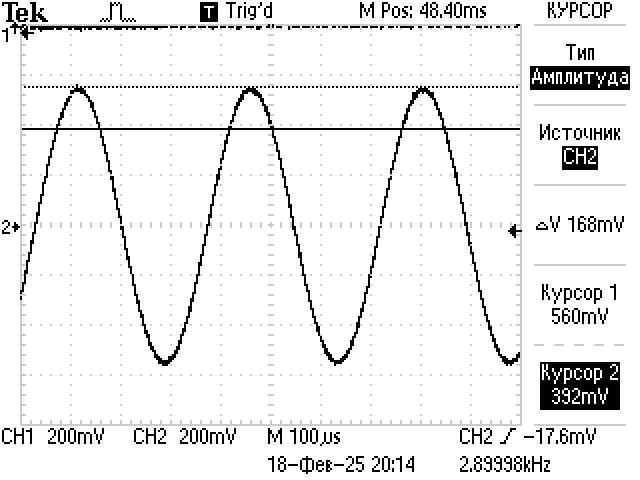

In [1245]:
Image("pictures/TEK0014.JPG")

## Исследование запредельных колебаний

$\omega = \omega_0 \ch(\frac{\psi}{2})$

$ \psi = 2 \operatorname{arcch}(\frac{\omega}{\omega_0})$

In [1246]:
extreme_fluctuations: dict[str, Any] =\
{
  "voltage": np.array([44, 37, 16.8, 9.6, 10.4, 8, 6.4, 4.8, 3.2]),
  "frequency": np.arange(36, 44+1) # * 10**3
}

print(2*np.arccosh((extreme_fluctuations["frequency"]*10**3)/nu_0))

[       nan        nan        nan 0.45079806 0.64102419 0.78538854
 0.90610379 1.01168835 1.10649736]


C:\Users\dmitr\AppData\Local\Temp\ipykernel_18472\200764679.py:7: RuntimeWarning: invalid value encountered in arccosh
  print(2*np.arccosh((extreme_fluctuations["frequency"]*10**3)/nu_0))


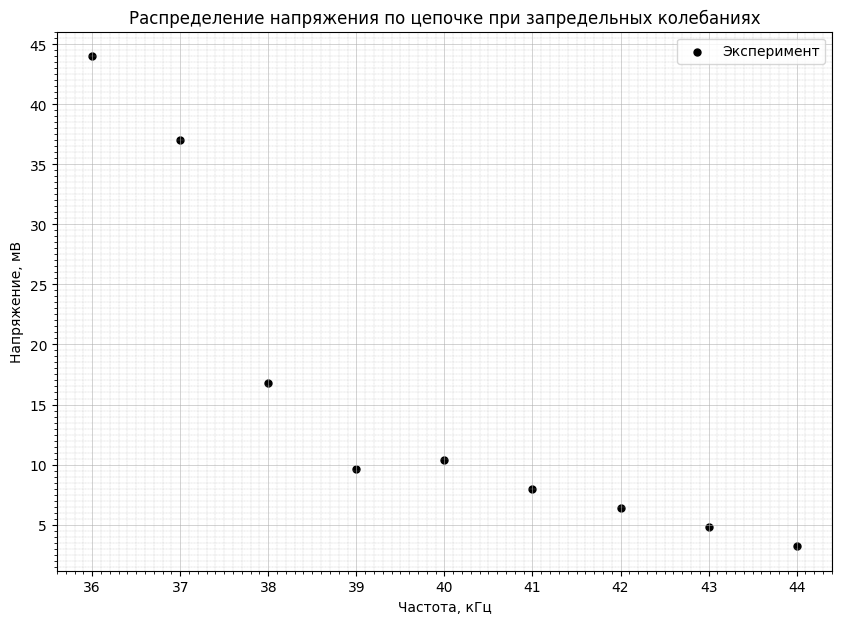

In [1247]:
_, axs = polt.subplots(1, 1, figsize = (10, 7))

axs.set_title("Распределение напряжения по цепочке при запредельных колебаниях")
axs.set_xlabel("Частота, кГц")
axs.set_ylabel("Напряжение, мВ")

axs.scatter(extreme_fluctuations["frequency"], 
            extreme_fluctuations["voltage"], 
            marker = "o",
            s = 25, 
            label = "Эксперимент", 
            color = "black")

axs.xaxis.set_major_locator(MultipleLocator(1))
axs.xaxis.set_minor_locator(AutoMinorLocator(10))
axs.yaxis.set_minor_locator(AutoMinorLocator(10))

polt.grid(which = 'minor', linestyle = '--', linewidth = 0.2)
polt.grid(which = 'major', linewidth = 0.4)

polt.legend()
polt.show()